In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import scipy
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pymysql

In [2]:
ca= pd.read_excel('purchase_data2.xlsx') # read the data

In [3]:
ca.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,2020-01-01 00:00:00 UTC,view,5809910,1.602944e+18,NaN,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
1,2020-01-01 00:00:09 UTC,view,5812943,1.487580e+18,NaN,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
2,2020-01-01 00:00:19 UTC,view,5798924,1.783999e+18,NaN,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
3,2020-01-01 00:00:24 UTC,view,5793052,1.487580e+18,NaN,NaN,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
4,2020-01-01 00:00:25 UTC,view,5899926,2.115334e+18,NaN,NaN,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb,0.0,0.0,47.0,1.0,110866.0,1.0,0.0


In [7]:
features = ['user_id','Sex','Marital status','Age','Education','Income','Occupation','Settlement size'] # Choose columns for data analysis
df_ca=ca[features]


In [8]:
df_ca.head()

,user_id,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,595414620,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
1,595414640,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
2,595412617,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
3,420652863,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
4,484071203,0.0,0.0,47.0,1.0,110866.0,1.0,0.0


In [9]:
df_ca.set_index('user_id')

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
user_id,,,,,,,
595414620,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
595414640,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
595412617,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
420652863,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
484071203,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
...,...,...,...,...,...,...,...
559289862,0.0,0.0,42.0,1.0,120946.0,1.0,0.0
544718392,0.0,0.0,42.0,1.0,120946.0,1.0,0.0
595690501,0.0,0.0,42.0,1.0,120946.0,1.0,0.0


In [25]:
df_ca.fillna(0,inplace=True)

In [26]:
df_ca.isnull().sum()

user_id            0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [27]:
df_ca.describe() # summary of statistics

,user_id,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,5.869400e+04,58694.000000,58694.000000,58694.000000,58694.000000,58694.000000,58694.000000,58694.000000
mean,5.325332e+08,0.385883,0.393107,38.793301,1.101561,121839.568440,0.774185,0.655893
std,8.326362e+07,0.486807,0.488444,12.053408,0.652509,40646.505875,0.663249,0.794160
min,3.856038e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.976420e+08,0.000000,0.000000,30.000000,1.000000,95541.000000,0.000000,0.000000
50%,5.647320e+08,0.000000,0.000000,36.000000,1.000000,117971.000000,1.000000,0.000000
75%,5.950278e+08,1.000000,1.000000,46.000000,1.000000,138525.000000,1.000000,1.000000
max,5.956921e+08,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000


[]

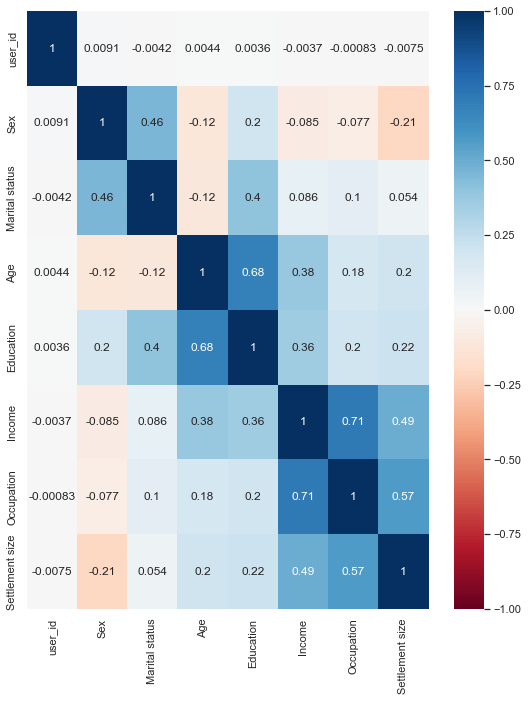

In [28]:
plt.figure(figsize=(9,11)) # Plot the correlation between variables. We observe the positive correlation between income and occupation
s = sns.heatmap(df_ca.corr(),annot=True,cmap='RdBu',vmin=-1,vmax=1)
s.set()

Text(0.5, 1.0, 'Age-Income')

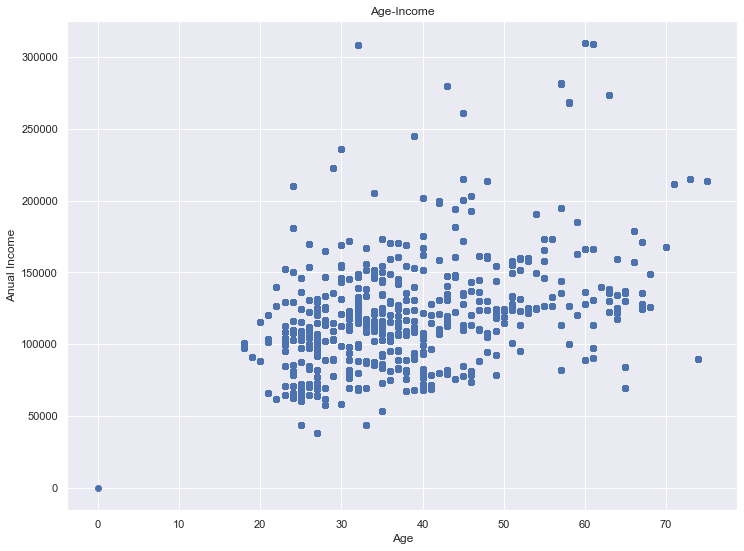

In [30]:
plt.figure(figsize=(12,9))
plt.scatter(df_ca.iloc[:,3],df_ca.iloc[:,5])
plt.xlabel('Age')
plt.ylabel('Anual Income')
plt.title('Age-Income')


In [31]:
scaler = StandardScaler() # Scale the data
df_ca_scaled = scaler.fit_transform(df_ca)

In [32]:
df_ca_scaled

array([[ 0.75521571, -0.79268748, -0.80482041, ..., -0.26997799,
         0.34047092, -0.82590287],
       [ 0.75521595, -0.79268748, -0.80482041, ..., -0.26997799,
         0.34047092, -0.82590287],
       [ 0.75519165, -0.79268748, -0.80482041, ..., -0.26997799,
         0.34047092, -0.82590287],
       ...,
       [ 0.75852908, -0.79268748, -0.80482041, ..., -0.02198408,
         0.34047092, -0.82590287],
       [ 0.75853473, -0.79268748, -0.80482041, ..., -0.02198408,
         0.34047092, -0.82590287],
       [ 0.32135197, -0.79268748, -0.80482041, ..., -2.99756655,
        -1.16727016, -0.82590287]])

In [33]:
W=[] # We use loop in order to identify the number of clusters.Random_state=42 help to reproduce the same result 

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df_ca_scaled)
    W.append(kmeans.inertia_)
    
    

Text(0.5, 1.0, 'Number of Clusters')

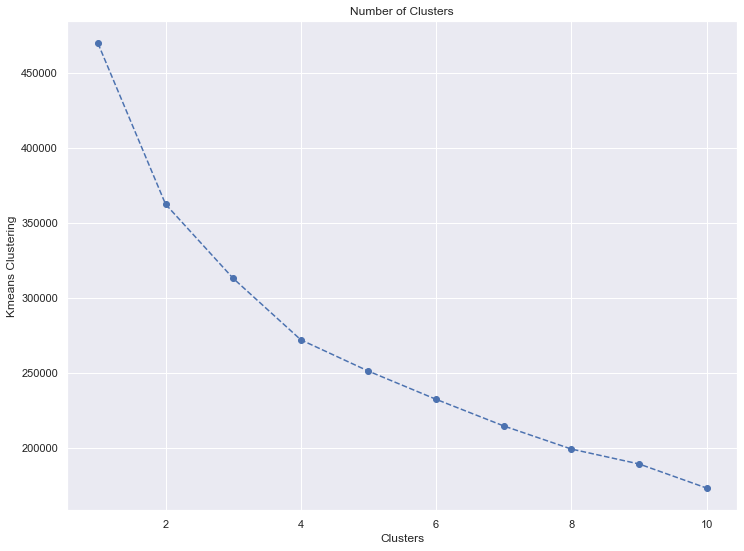

In [34]:
# plot the Number of Cluster vs Kmeans Clustering . We use the elbow method to choose the number of clusters. The cluster =4 when Wcss starts to flatten 
plt.figure(figsize=(12,9))
plt.plot(range(1,11),W,marker='o',linestyle='--')
plt.xlabel('Clusters')
plt.ylabel('Kmeans Clustering')
plt.title('Number of Clusters')

In [35]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans.fit(df_ca_scaled)


KMeans(n_clusters=4, random_state=42)

In [36]:
df_segm_kmeans = df_ca.copy()

In [37]:
# We put labels.
df_segm_kmeans['segment kmeans'] = kmeans.labels_
df_segm_analysis = df_segm_kmeans.groupby(['segment kmeans']).mean()

In [38]:
df_segm_analysis

,user_id,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
segment kmeans,,,,,,,,
0,5.333888e+08,0.723785,1.000000,30.601682,1.098502,104843.757773,0.565644,0.362564
1,5.275812e+08,0.028013,0.141214,38.359238,0.830691,140255.384786,1.306005,1.589091
2,5.340485e+08,0.470395,0.674724,54.738711,2.115140,164482.434045,1.264100,1.187277
3,5.340080e+08,0.324683,0.000000,36.535192,0.756856,101612.743489,0.370777,0.062180


In [39]:
df_segm_analysis["N_obs"] = df_segm_kmeans[['segment kmeans','Sex']].groupby(['segment kmeans']).count()

In [40]:
df_segm_analysis['Prob obs'] = df_segm_analysis['N_obs']/df_segm_analysis['N_obs'].sum()

In [41]:
# We groupby by segments 
df_segm_analysis

,user_id,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N_obs,Prob obs
segment kmeans,,,,,,,,,,
0,5.333888e+08,0.723785,1.000000,30.601682,1.098502,104843.757773,0.565644,0.362564,14152,0.241115
1,5.275812e+08,0.028013,0.141214,38.359238,0.830691,140255.384786,1.306005,1.589091,12173,0.207398
2,5.340485e+08,0.470395,0.674724,54.738711,2.115140,164482.434045,1.264100,1.187277,10674,0.181858
3,5.340080e+08,0.324683,0.000000,36.535192,0.756856,101612.743489,0.370777,0.062180,21695,0.369629


In [43]:
# we give a name to segments
df_segm_analysis.rename({0:'standard',
                         1:'career-focused',
                         2:'well-done',
                         3:'fewer-opportunities'})

,user_id,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N_obs,Prob obs
segment kmeans,,,,,,,,,,
standard,5.333888e+08,0.723785,1.000000,30.601682,1.098502,104843.757773,0.565644,0.362564,14152,0.241115
career-focused,5.275812e+08,0.028013,0.141214,38.359238,0.830691,140255.384786,1.306005,1.589091,12173,0.207398
well-done,5.340485e+08,0.470395,0.674724,54.738711,2.115140,164482.434045,1.264100,1.187277,10674,0.181858
fewer-opportunities,5.340080e+08,0.324683,0.000000,36.535192,0.756856,101612.743489,0.370777,0.062180,21695,0.369629


In [44]:
df_segm_kmeans['Labels'] = df_segm_kmeans['segment kmeans'].map({0:'standard',
                        1:'career-focused',
                        2:'well-done',
                        3:'fewer-opportunities'})

In [45]:
df_segm_kmeans

,user_id,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment kmeans,Labels
0,595414620,0.0,0.0,47.0,1.0,110866.0,1.0,0.0,3,fewer-opportunities
1,595414640,0.0,0.0,47.0,1.0,110866.0,1.0,0.0,3,fewer-opportunities
2,595412617,0.0,0.0,47.0,1.0,110866.0,1.0,0.0,3,fewer-opportunities
3,420652863,0.0,0.0,47.0,1.0,110866.0,1.0,0.0,3,fewer-opportunities
4,484071203,0.0,0.0,47.0,1.0,110866.0,1.0,0.0,3,fewer-opportunities
...,...,...,...,...,...,...,...,...,...,...
58689,559289862,0.0,0.0,42.0,1.0,120946.0,1.0,0.0,3,fewer-opportunities
58690,544718392,0.0,0.0,42.0,1.0,120946.0,1.0,0.0,3,fewer-opportunities
58691,595690501,0.0,0.0,42.0,1.0,120946.0,1.0,0.0,3,fewer-opportunities
58692,595690971,0.0,0.0,42.0,1.0,120946.0,1.0,0.0,3,fewer-opportunities


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


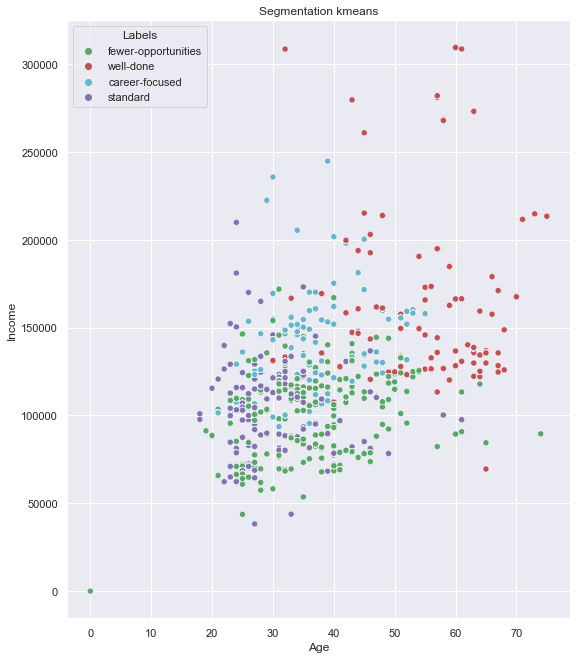

In [46]:
# We plot the data but it is difficult to seperate the segments for that reason we take PCA
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize=(9,11))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Labels'],palette=['g','r','c','m'])
plt.title('Segmentation kmeans')
plt.show()

In [47]:
pca=PCA()

In [49]:
pca.fit(df_ca_scaled)

PCA()

In [50]:
pca.explained_variance_ratio_

array([0.33121817, 0.2087416 , 0.15290662, 0.12499015, 0.07448338,
       0.05691841, 0.03137624, 0.01936543])

Text(0, 0.5, 'Cumulative explained variance')

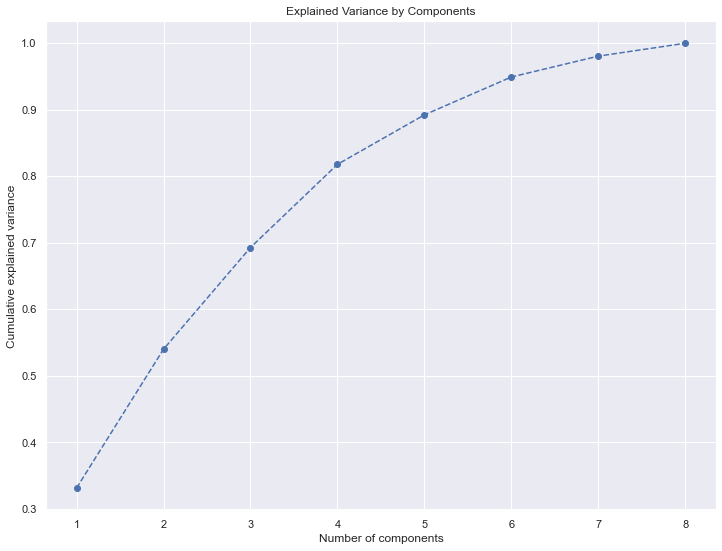

In [54]:
plt.figure(figsize=(12,9))
plt.plot(range(1,9),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


In [55]:
pca = PCA(n_components=4)
pca.fit(df_ca_scaled)

PCA(n_components=4)

In [56]:
pca.components_

array([[-0.00200122, -0.04417117,  0.13002219,  0.38329605,  0.40825395,
         0.51483628,  0.46951564,  0.42667394],
       [ 0.01028974,  0.62719286,  0.60647768,  0.01900317,  0.39498554,
        -0.10564716, -0.15414656, -0.21774042],
       [ 0.03125282, -0.1887316 , -0.31746851,  0.66244582,  0.4053695 ,
        -0.16044682, -0.39905524, -0.27289232],
       [-0.99920637, -0.01319354,  0.00860279,  0.01766001,  0.01867186,
        -0.01009369, -0.02362864, -0.00422388]])

In [58]:
df_pca = pd.DataFrame(data=pca.components_,columns=df_ca.columns.values,index=['Component 1','Component 2','Component 3','component 4'])
df_pca

,user_id,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.002001,-0.044171,0.130022,0.383296,0.408254,0.514836,0.469516,0.426674
Component 2,0.010290,0.627193,0.606478,0.019003,0.394986,-0.105647,-0.154147,-0.217740
Component 3,0.031253,-0.188732,-0.317469,0.662446,0.405369,-0.160447,-0.399055,-0.272892
component 4,-0.999206,-0.013194,0.008603,0.017660,0.018672,-0.010094,-0.023629,-0.004224


([<matplotlib.axis.YTick at 0x26d2c8825e0>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3'),
  Text(0, 3, 'component 4')])

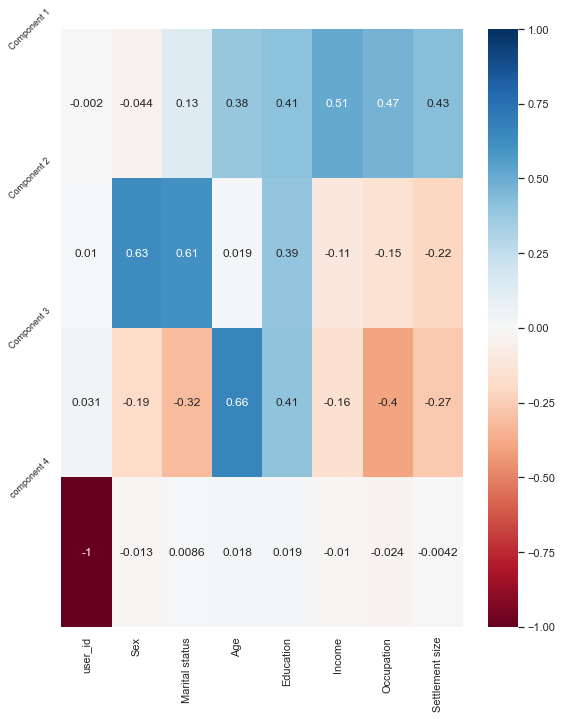

In [63]:
plt.figure(figsize=(9,11))
sns.heatmap(df_pca,vmin=-1,vmax=1,cmap='RdBu',annot=True)
plt.yticks([0,1,2,3],['Component 1','Component 2','Component 3','component 4'],rotation=45,fontsize=9)

In [65]:
pca.transform(df_ca_scaled)


array([[-0.20524132, -0.87017009,  0.94948862, -0.74379508],
       [-0.20524132, -0.87017009,  0.94948863, -0.74379532],
       [-0.20524127, -0.87017034,  0.94948787, -0.74377105],
       ...,
       [-0.23657207, -0.90421882,  0.63500395, -0.75693479],
       [-0.23657209, -0.90421876,  0.63500412, -0.75694044],
       [-4.43681954, -1.03349797, -1.22912358, -0.34459658]])

In [66]:
score_pca = pca.transform(df_ca_scaled)

# KMEANS CLUSTERING WITH PCA

In [67]:
w= []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans_pca.fit(score_pca)
    w.append(kmeans_pca.inertia_)

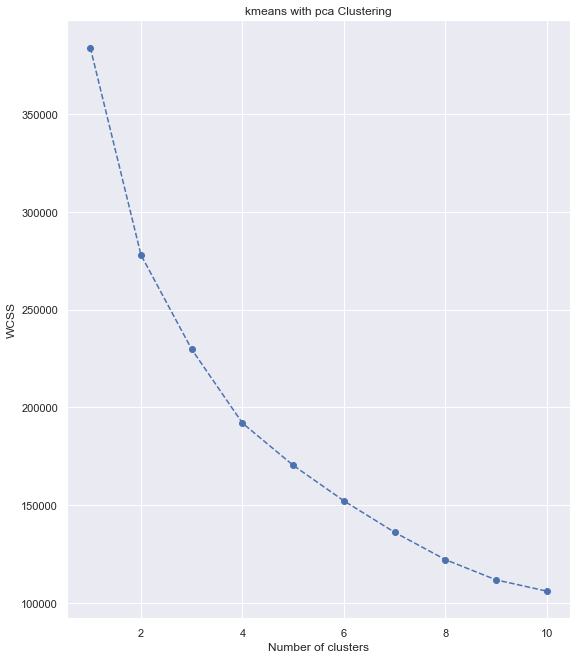

In [68]:
plt.figure(figsize=(9,11))
plt.plot(range(1,11),w,marker='o',linestyle="--")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('kmeans with pca Clustering')
plt.show()

In [69]:
kmeans_pca = KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans_pca.fit(score_pca)

KMeans(n_clusters=4, random_state=42)

# RESULTS

In [70]:
df_kmeans_pca = pd.concat([df_ca.reset_index(drop=True),pd.DataFrame(score_pca)],axis=1)
df_kmeans_pca.columns.values[-4:] = ['component 1','component 2','component 3','component 4']
df_kmeans_pca['Segm_kmeans_PCA'] = kmeans_pca.labels_
df_kmeans_pca

,user_id,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component 1,component 2,component 3,component 4,Segm_kmeans_PCA
0,595414620,0.0,0.0,47.0,1.0,110866.0,1.0,0.0,-0.205241,-0.870170,0.949489,-0.743795,3
1,595414640,0.0,0.0,47.0,1.0,110866.0,1.0,0.0,-0.205241,-0.870170,0.949489,-0.743795,3
2,595412617,0.0,0.0,47.0,1.0,110866.0,1.0,0.0,-0.205241,-0.870170,0.949488,-0.743771,3
3,420652863,0.0,0.0,47.0,1.0,110866.0,1.0,0.0,-0.201041,-0.891767,0.883892,1.353454,3
4,484071203,0.0,0.0,47.0,1.0,110866.0,1.0,0.0,-0.202565,-0.883930,0.907696,0.592395,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58689,559289862,0.0,0.0,42.0,1.0,120946.0,1.0,0.0,-0.235697,-0.908717,0.621341,-0.320105,3
58690,544718392,0.0,0.0,42.0,1.0,120946.0,1.0,0.0,-0.235347,-0.910518,0.615872,-0.145238,3
58691,595690501,0.0,0.0,42.0,1.0,120946.0,1.0,0.0,-0.236572,-0.904219,0.635004,-0.756935,3
58692,595690971,0.0,0.0,42.0,1.0,120946.0,1.0,0.0,-0.236572,-0.904219,0.635004,-0.756940,3


In [71]:
df_kmeans_analysis = df_kmeans_pca.groupby(['Segm_kmeans_PCA']).mean()

In [72]:
df_kmeans_analysis

,user_id,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component 1,component 2,component 3,component 4
Segm_kmeans_PCA,,,,,,,,,,,,
0,5.345926e+08,0.905178,0.868895,30.549174,1.085347,111052.679324,0.721777,0.407418,-0.500050,1.345610,-0.813473,-0.037085
1,5.269467e+08,0.000917,0.146013,38.238514,0.821115,140246.480391,1.274979,1.465637,0.798893,-1.360372,-0.549188,0.037566
2,5.341163e+08,0.464475,0.671088,54.881110,2.116427,164550.370500,1.267052,1.200549,2.395916,0.711418,0.651816,0.005317
3,5.338542e+08,0.252309,0.104888,36.446414,0.783322,96432.771197,0.259304,0.051534,-1.349381,-0.374740,0.530678,-0.001988


In [41]:
df_kmeans_analysis['N_obs'] = df_kmeans_pca[['Segm_kmeans_PCA','Age']].groupby(['Segm_kmeans_PCA']).count()
df_kmeans_analysis['Prob'] = df_kmeans_analysis['N_obs']/df_kmeans_analysis['N_obs'].sum()
df_kmeans_analysis = df_kmeans_pca.rename({0:'standard',
                                           1:'career focused',
                                           2:'well-done',
                                           3:'fewer-opportunities'})

In [73]:
df_kmeans_pca['Labels'] = df_kmeans_pca['Segm_kmeans_PCA'].map({0:'standard',
                                           1:'career focused',
                                           2:'well-done',
                                           3:'fewer-opportunities'})
df_kmeans_pca

,user_id,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component 1,component 2,component 3,component 4,Segm_kmeans_PCA,Labels
0,595414620,0.0,0.0,47.0,1.0,110866.0,1.0,0.0,-0.205241,-0.870170,0.949489,-0.743795,3,fewer-opportunities
1,595414640,0.0,0.0,47.0,1.0,110866.0,1.0,0.0,-0.205241,-0.870170,0.949489,-0.743795,3,fewer-opportunities
2,595412617,0.0,0.0,47.0,1.0,110866.0,1.0,0.0,-0.205241,-0.870170,0.949488,-0.743771,3,fewer-opportunities
3,420652863,0.0,0.0,47.0,1.0,110866.0,1.0,0.0,-0.201041,-0.891767,0.883892,1.353454,3,fewer-opportunities
4,484071203,0.0,0.0,47.0,1.0,110866.0,1.0,0.0,-0.202565,-0.883930,0.907696,0.592395,3,fewer-opportunities
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58689,559289862,0.0,0.0,42.0,1.0,120946.0,1.0,0.0,-0.235697,-0.908717,0.621341,-0.320105,3,fewer-opportunities
58690,544718392,0.0,0.0,42.0,1.0,120946.0,1.0,0.0,-0.235347,-0.910518,0.615872,-0.145238,3,fewer-opportunities
58691,595690501,0.0,0.0,42.0,1.0,120946.0,1.0,0.0,-0.236572,-0.904219,0.635004,-0.756935,3,fewer-opportunities
58692,595690971,0.0,0.0,42.0,1.0,120946.0,1.0,0.0,-0.236572,-0.904219,0.635004,-0.756940,3,fewer-opportunities


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


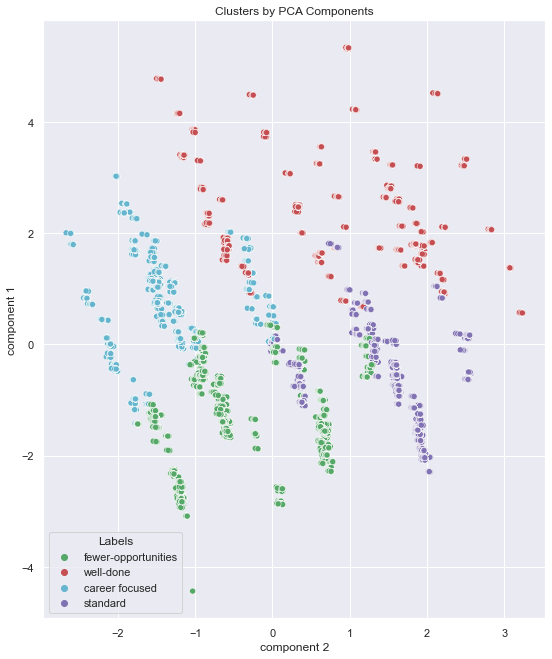

In [74]:
# With PCA we can plot better the data. 
x_axis = df_kmeans_pca['component 2']
y_axis = df_kmeans_pca['component 1']
plt.figure(figsize=(9,11))
sns.scatterplot(x_axis,y_axis,hue=df_kmeans_pca['Labels'],palette=['g','r','c','m'])
plt.title('Clusters by PCA Components')
plt.show()

# Purchase Data

In [2]:
# We input the purchase data
pur_data = pd.read_excel('purchase_data2.xlsx')

In [3]:
pur_data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,2020-01-01 00:00:00 UTC,view,5809910,1.602944e+18,NaN,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
1,2020-01-01 00:00:09 UTC,view,5812943,1.487580e+18,NaN,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
2,2020-01-01 00:00:19 UTC,view,5798924,1.783999e+18,NaN,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
3,2020-01-01 00:00:24 UTC,view,5793052,1.487580e+18,NaN,NaN,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
4,2020-01-01 00:00:25 UTC,view,5899926,2.115334e+18,NaN,NaN,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58689,2020-01-01 19:02:18 UTC,view,5864599,1.487580e+18,NaN,italwax,14.52,559289862,47afcc01-33f7-4fe8-8c20-3de049cbb448,0.0,0.0,42.0,1.0,120946.0,1.0,0.0
58690,2020-01-01 19:02:19 UTC,cart,4938,1.487580e+18,NaN,runail,1.43,544718392,e645419f-a77c-4484-9cbc-cd7f98db65d2,0.0,0.0,42.0,1.0,120946.0,1.0,0.0
58691,2020-01-01 19:02:20 UTC,view,5793261,1.487580e+18,NaN,NaN,22.21,595690501,debba53f-ec68-41d7-be43-9a66dfa3c23b,0.0,0.0,42.0,1.0,120946.0,1.0,0.0
58692,2020-01-01 19:02:21 UTC,view,37987,1.487580e+18,NaN,runail,42.86,595690971,1325847d-2e31-4ec2-926f-1ffb3e8b81fb,0.0,0.0,42.0,1.0,120946.0,1.0,0.0


In [4]:
# we check all the brands
pur_data['brand'].unique()

array(['grattol', 'kinetics', 'zinger', nan, 'staleks', 'marathon',
       'italwax', 'dartnails', 'milv', 'irisk', 'kapous', 'severina',
       'art-visage', 'runail', 'estel', 'strong', 'missha', 'entity',
       'laiseven', 'kiss', 'domix', 'jessnail', 'solomeya', 'uno',
       'insight', 'laboratorium', 'ingarden', 'metzger', 'airnails',
       'cutrin', 'zeitun', 'oniq', 'concept', 'roubloff', 'ecocraft',
       'cnd', 'jas', 'yoko', 'cosmoprofi', 'igrobeauty', 'bpw.style',
       'haruyama', 'uskusi', 'enas', 'lovely', 'opi', 'bluesky',
       'markell', 'masura', 'farmstay', 'pnb', 'lianail', 'beauty-free',
       'de.lux', 'levrana', 'profhenna', 'dewal', 's.care', 'refectocil',
       'pole', 'f.o.x', 'babyliss', 'skinlite', 'shik', 'freedecor',
       'orly', 'lador', 'avene', 'bioaqua', 'rosi', 'polarus', 'kims',
       'artex', 'beautix', 'thuya', 'sophin', 'parachute', 'ellips',
       'enigma', 'nagaraku', 'relouis', 'moyou', 'konad', 'vosev',
       'ardell', 'beautific'

In [5]:
pur_data.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code      57729
brand              26582
price                  0
user_id                0
user_session           7
Sex                    1
Marital status         1
Age                    1
Education              1
Income                 1
Occupation             1
Settlement size        1
dtype: int64

In [6]:
pur_data = pur_data.dropna(subset=['brand'])
pur_data['category_code'].fillna(0,inplace=True)
pur_data['Sex'].fillna(0,inplace=True)
pur_data['Marital status'].fillna(0,inplace=True)
pur_data['Age'].fillna(0,inplace=True)
pur_data['Education'].fillna(0,inplace=True)
pur_data['Income'].fillna(0,inplace=True)
pur_data['Occupation'].fillna(0,inplace=True)
pur_data['Settlement size'].fillna(0,inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [7]:
pur_data.isnull().sum()

event_time         0
event_type         0
product_id         0
category_id        0
category_code      0
brand              0
price              0
user_id            0
user_session       3
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [8]:
from datetime import datetime

In [9]:
pur_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32112 entries, 0 to 58693
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   event_time       32112 non-null  object 
 1   event_type       32112 non-null  object 
 2   product_id       32112 non-null  int64  
 3   category_id      32112 non-null  float64
 4   category_code    32112 non-null  object 
 5   brand            32112 non-null  object 
 6   price            32112 non-null  float64
 7   user_id          32112 non-null  int64  
 8   user_session     32109 non-null  object 
 9   Sex              32112 non-null  float64
 10  Marital status   32112 non-null  float64
 11  Age              32112 non-null  float64
 12  Education        32112 non-null  float64
 13  Income           32112 non-null  float64
 14  Occupation       32112 non-null  float64
 15  Settlement size  32112 non-null  float64
dtypes: float64(9), int64(2), object(5)
memory usage: 4.2+ MB


In [10]:
pur_data['event_time'] = pur_data['event_time'].str.replace('UTC','')

C:\Users\User\AppData\Local\Temp/ipykernel_3632/3967468857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pur_data['event_time'] = pur_data['event_time'].str.replace('UTC','')


In [11]:

pur_data['event_time'] = pd.to_datetime(pur_data['event_time'],format='%Y-%m-%d %H:%M:%S')

C:\Users\User\AppData\Local\Temp/ipykernel_3632/2516979861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pur_data['event_time'] = pd.to_datetime(pur_data['event_time'],format='%Y-%m-%d %H:%M:%S')


In [12]:
pur_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,2020-01-01 00:00:00,view,5809910,1.602944e+18,0,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
1,2020-01-01 00:00:09,view,5812943,1.487580e+18,0,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
2,2020-01-01 00:00:19,view,5798924,1.783999e+18,0,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
5,2020-01-01 00:00:30,view,5837111,1.783999e+18,0,staleks,6.35,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
6,2020-01-01 00:00:37,cart,5850281,1.487580e+18,0,marathon,137.78,593016733,848f607c-1d14-474a-8869-c40e60783c9d,0.0,0.0,47.0,1.0,110866.0,1.0,0.0


In [13]:
pur_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32112 entries, 0 to 58693
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   event_time       32112 non-null  datetime64[ns]
 1   event_type       32112 non-null  object        
 2   product_id       32112 non-null  int64         
 3   category_id      32112 non-null  float64       
 4   category_code    32112 non-null  object        
 5   brand            32112 non-null  object        
 6   price            32112 non-null  float64       
 7   user_id          32112 non-null  int64         
 8   user_session     32109 non-null  object        
 9   Sex              32112 non-null  float64       
 10  Marital status   32112 non-null  float64       
 11  Age              32112 non-null  float64       
 12  Education        32112 non-null  float64       
 13  Income           32112 non-null  float64       
 14  Occupation       32112 non-null  float

In [14]:
# We take only the days
pur_data['event_time'] = pur_data['event_time'].dt.day

C:\Users\User\AppData\Local\Temp/ipykernel_3632/2078388561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pur_data['event_time'] = pur_data['event_time'].dt.day


In [15]:
pur_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,1,view,5809910,1.602944e+18,0,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
1,1,view,5812943,1.487580e+18,0,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
2,1,view,5798924,1.783999e+18,0,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
5,1,view,5837111,1.783999e+18,0,staleks,6.35,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
6,1,cart,5850281,1.487580e+18,0,marathon,137.78,593016733,848f607c-1d14-474a-8869-c40e60783c9d,0.0,0.0,47.0,1.0,110866.0,1.0,0.0


In [16]:
pur_data['event_type'].unique()

array(['view', 'cart', 'remove_from_cart', 'purchase'], dtype=object)

In [17]:
# We seperate the data. View,Cart and remove from cart is 0 and purchase is 1.
pur_data['event_type'] = np.where(pur_data['event_type'].isin(['view','cart','remove_from_cart']),0,1)

C:\Users\User\AppData\Local\Temp/ipykernel_3632/2328236190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pur_data['event_type'] = np.where(pur_data['event_type'].isin(['view','cart','remove_from_cart']),0,1)


In [18]:
pur_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,1,0,5809910,1.602944e+18,0,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
1,1,0,5812943,1.487580e+18,0,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
2,1,0,5798924,1.783999e+18,0,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
5,1,0,5837111,1.783999e+18,0,staleks,6.35,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
6,1,0,5850281,1.487580e+18,0,marathon,137.78,593016733,848f607c-1d14-474a-8869-c40e60783c9d,0.0,0.0,47.0,1.0,110866.0,1.0,0.0


In [19]:
scaler = StandardScaler()

In [20]:
pca = PCA()


In [21]:
features = pur_data[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]
df_data_std = scaler.fit_transform(features)
pca.fit(df_data_std)
df_data_std_pca = pca.transform(df_data_std)


In [22]:
df_data_std

array([[-0.79422654, -0.8036947 ,  0.6881857 , ..., -0.26055619,
         0.34876017, -0.82568728],
       [-0.79422654, -0.8036947 ,  0.6881857 , ..., -0.26055619,
         0.34876017, -0.82568728],
       [-0.79422654, -0.8036947 ,  0.6881857 , ..., -0.26055619,
         0.34876017, -0.82568728],
       ...,
       [-0.79422654, -0.8036947 ,  0.27048224, ..., -0.0116423 ,
         0.34876017, -0.82568728],
       [-0.79422654, -0.8036947 ,  0.27048224, ..., -0.0116423 ,
         0.34876017, -0.82568728],
       [-0.79422654, -0.8036947 , -3.23822681, ..., -2.99826327,
        -1.15998113, -0.82568728]])

In [23]:
kmeans_pca = KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans_pca.fit(df_data_std_pca)

KMeans(n_clusters=4, random_state=42)

In [24]:
df_data_kmeans_pca = kmeans_pca.predict(df_data_std_pca)

In [25]:
df_purchase_predictors = pur_data.copy()

In [26]:
df_purchase_predictors['Segment'] = df_data_kmeans_pca

In [27]:
df_purchase_predictors.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,1,0,5809910,1.602944e+18,0,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a,0.0,0.0,47.0,1.0,110866.0,1.0,0.0,2
1,1,0,5812943,1.487580e+18,0,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a,0.0,0.0,47.0,1.0,110866.0,1.0,0.0,2
2,1,0,5798924,1.783999e+18,0,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3,0.0,0.0,47.0,1.0,110866.0,1.0,0.0,2
5,1,0,5837111,1.783999e+18,0,staleks,6.35,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3,0.0,0.0,47.0,1.0,110866.0,1.0,0.0,2
6,1,0,5850281,1.487580e+18,0,marathon,137.78,593016733,848f607c-1d14-474a-8869-c40e60783c9d,0.0,0.0,47.0,1.0,110866.0,1.0,0.0,2


# Descriptive Analysis by Segments

In [28]:
df_temp = df_purchase_predictors[['user_id','event_type']].groupby(['user_id'],as_index=False).count()
df_temp

,user_id,event_type
0,56612519,9
1,70197834,24
2,72931003,33
3,74332980,1
4,76025480,32
...,...,...
6775,595691878,1
6776,595691922,3
6777,595691986,1
6778,595692020,1


In [29]:
df_temp=df_temp.set_index('user_id')
df_temp =df_temp.rename(columns={'event_type':'N_visits'})
df_temp

,N_visits
user_id,
56612519,9
70197834,24
72931003,33
74332980,1
76025480,32
...,...
595691878,1
595691922,3
595691986,1


In [30]:
df_temp2 = df_purchase_predictors[['user_id','event_type']].groupby(['user_id'],as_index=False).sum()
df_temp2 = df_temp2.set_index('user_id')
df_temp2 = df_temp2.rename(columns={'event_type':'N_Purchase'})
df_temp3 = df_temp.join(df_temp2)
df_temp3

,N_visits,N_Purchase
user_id,,
56612519,9,0
70197834,24,0
72931003,33,0
74332980,1,0
76025480,32,5
...,...,...
595691878,1,0
595691922,3,0
595691986,1,0


In [31]:
df_temp3['Average'] = df_temp3['N_Purchase']/df_temp3['N_visits']
df_temp3

,N_visits,N_Purchase,Average
user_id,,,
56612519,9,0,0.00000
70197834,24,0,0.00000
72931003,33,0,0.00000
74332980,1,0,0.00000
76025480,32,5,0.15625
...,...,...,...
595691878,1,0,0.00000
595691922,3,0,0.00000
595691986,1,0,0.00000


In [32]:
df_temp3['N_Purchase'].max()

42

In [33]:
df_temp4 = df_purchase_predictors[['user_id','Segment']].groupby(['user_id'],as_index=False).mean()
df_temp4 = round(df_temp4)
df_temp4 = df_temp4.set_index('user_id')
df_temp4 = df_temp3.join(df_temp4)
df_temp4

,N_visits,N_Purchase,Average,Segment
user_id,,,,
56612519,9,0,0.00000,0.0
70197834,24,0,0.00000,0.0
72931003,33,0,0.00000,2.0
74332980,1,0,0.00000,2.0
76025480,32,5,0.15625,1.0
...,...,...,...,...
595691878,1,0,0.00000,2.0
595691922,3,0,0.00000,2.0
595691986,1,0,0.00000,2.0


In [34]:
df_purchase_predictors.shape[0]

32112

In [35]:
segment_prop = df_temp4[['N_Purchase','Segment']].groupby(['Segment'],as_index=False).count()/df_temp4.shape[0]
segment_prop = segment_prop.rename(columns={'N_Purchase':'Segment Proportions'})
segment_prop

,Segment,Segment Proportions
0,0.000000,0.167699
1,0.000147,0.274484
2,0.000295,0.432596
3,0.000442,0.125221


Text(0.5, 1.0, 'Segment Proportions')

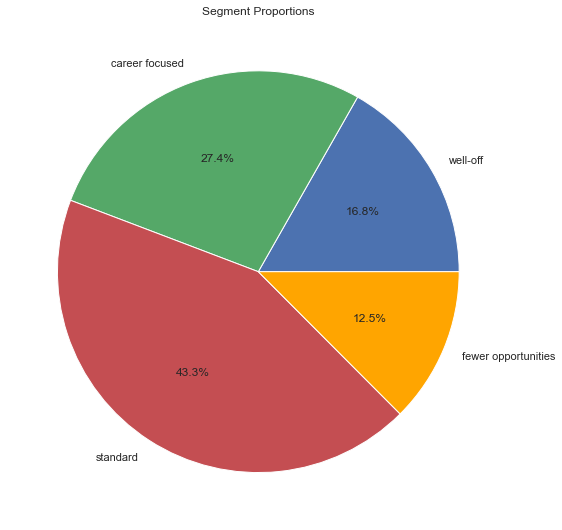

In [36]:
plt.figure(figsize=(9,11))
plt.pie(segment_prop['Segment Proportions'],labels=['well-off','career focused','standard','fewer opportunities'],autopct='%1.1f%%',colors=('b','g','r','orange'))
plt.title('Segment Proportions')


# Brand Choise

In [37]:
df_purchase = df_purchase_predictors[df_purchase_predictors['event_type']==1]

In [38]:
df_purchase

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
61,1,1,5825203,2.089259e+18,0,kiss,7.92,595411904,74ca1cd5-5381-4ffe-b00b-a258b390db77,0.0,0.0,47.0,1.0,110866.0,1.0,0.0,2
591,1,1,4185,1.487580e+18,0,cnd,19.37,287758725,b276b96f-724f-4081-b56b-e8bc5e32e0c8,0.0,0.0,27.0,0.0,125190.0,2.0,1.0,0
649,1,1,59003,1.487580e+18,0,refectocil,7.46,336065468,8c3a4b60-b488-4848-9e9f-8c7ee751e0c0,0.0,0.0,27.0,0.0,125190.0,2.0,1.0,0
650,1,1,59002,1.487580e+18,0,refectocil,7.46,336065468,8c3a4b60-b488-4848-9e9f-8c7ee751e0c0,0.0,0.0,26.0,0.0,131122.0,1.0,0.0,2
651,1,1,5869135,1.783999e+18,0,cosmoprofi,19.05,336065468,8c3a4b60-b488-4848-9e9f-8c7ee751e0c0,0.0,0.0,26.0,0.0,131122.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58628,1,1,5739030,1.645114e+18,0,kapous,3.97,580499867,828a97bf-44e3-49b3-9d7e-94637ecca68a,0.0,0.0,42.0,1.0,120946.0,1.0,0.0,2
58629,1,1,5796701,1.487580e+18,0,masura,3.16,580499867,828a97bf-44e3-49b3-9d7e-94637ecca68a,0.0,0.0,42.0,1.0,120946.0,1.0,0.0,2
58630,1,1,5812568,1.487580e+18,0,masura,5.54,580499867,828a97bf-44e3-49b3-9d7e-94637ecca68a,0.0,0.0,42.0,1.0,120946.0,1.0,0.0,2
58631,1,1,5812573,1.487580e+18,0,masura,3.16,580499867,828a97bf-44e3-49b3-9d7e-94637ecca68a,0.0,0.0,42.0,1.0,120946.0,1.0,0.0,2


In [39]:
brand_dummies = df_purchase['brand'].str.get_dummies(" ")
brand_dummies['user_id'],brand_dummies['Segment'] = df_purchase['user_id'],df_purchase['Segment']
brand_dummies

,airnails,ardell,art-visage,artex,aura,avene,barex,beauty-free,benovy,bioaqua,...,swarovski,uno,uskusi,yllozure,yoko,ypsed,zeitun,zinger,user_id,Segment
61,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,595411904,2
591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,287758725,0
649,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,336065468,0
650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,336065468,2
651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,336065468,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58628,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,580499867,2
58629,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,580499867,2
58630,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,580499867,2
58631,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,580499867,2


In [40]:
temp = brand_dummies.groupby(['user_id'],as_index=True).mean()
temp = round(temp)
Brand_choise = temp.groupby(['Segment'],as_index=True).mean()
Brand_choise


,airnails,ardell,art-visage,artex,aura,avene,barex,beauty-free,benovy,bioaqua,...,staleks,strong,swarovski,uno,uskusi,yllozure,yoko,ypsed,zeitun,zinger
Segment,,,,,,,,,,,,,,,,,,,,,
0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.025641,0.000000,0.0,0.0,0.000000,0.0,0.025641
1.0,0.012195,0.0,0.000000,0.012195,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02439,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.012195
2.0,0.000000,0.0,0.009434,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.009434,0.0,0.000000
3.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.018868,0.018868,0.0,0.0,0.000000,0.0,0.000000


In [41]:
labels = Brand_choise.columns.values
labels

array(['airnails', 'ardell', 'art-visage', 'artex', 'aura', 'avene',
       'barex', 'beauty-free', 'benovy', 'bioaqua', 'biofollica',
       'bluesky', 'bodyton', 'bpw.style', 'chi', 'cnd', 'concept',
       'coocla', 'cosmoprofi', 'coxir', 'cristalinas', 'dartnails',
       'de.lux', 'depilflax', 'dizao', 'domix', 'ecocraft', 'ecolab',
       'elskin', 'enigma', 'estel', 'estrade', 'eunyul', 'f.o.x',
       'farmstay', 'freedecor', 'gehwol', 'glysolid', 'grattol',
       'haruyama', 'igrobeauty', 'ingarden', 'insight', 'irisk',
       'italwax', 'jessnail', 'kapous', 'kerasys', 'kezy', 'kinetics',
       'kiss', 'kocostar', 'konad', 'laboratorium', 'lakme', 'levissime',
       'levrana', 'lianail', 'limoni', 'lovely', 'markell', 'masura',
       'matreshka', 'matrix', 'mavala', 'max', 'mayamy', 'metzger',
       'milv', 'moyou', 'nagaraku', 'naomi', 'nitrile', 'nitrimax',
       'oniq', 'orly', 'parachute', 'petitfee', 'pnb', 'polarus', 'pole',
       'refectocil', 'relouis', 'rosi',

In [50]:
B = Brand_choise.iloc[:,10:40]
B

,biofollica,bluesky,bodyton,bpw.style,chi,cnd,concept,coocla,cosmoprofi,coxir,...,estel,estrade,eunyul,f.o.x,farmstay,freedecor,gehwol,glysolid,grattol,haruyama
Segment,,,,,,,,,,,,,,,,,,,,,
0.0,0.000000,0.025641,0.0,0.000000,0.000000,0.051282,0.000000,0.000000,0.076923,0.0,...,0.076923,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.025641,0.000000
1.0,0.000000,0.012195,0.0,0.000000,0.012195,0.024390,0.024390,0.000000,0.000000,0.0,...,0.024390,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.121951,0.024390
2.0,0.009434,0.047170,0.0,0.009434,0.000000,0.018868,0.028302,0.000000,0.000000,0.0,...,0.018868,0.009434,0.0,0.0,0.0,0.0,0.0,0.009434,0.018868,0.000000
3.0,0.000000,0.018868,0.0,0.018868,0.000000,0.018868,0.000000,0.018868,0.000000,0.0,...,0.037736,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.056604,0.018868


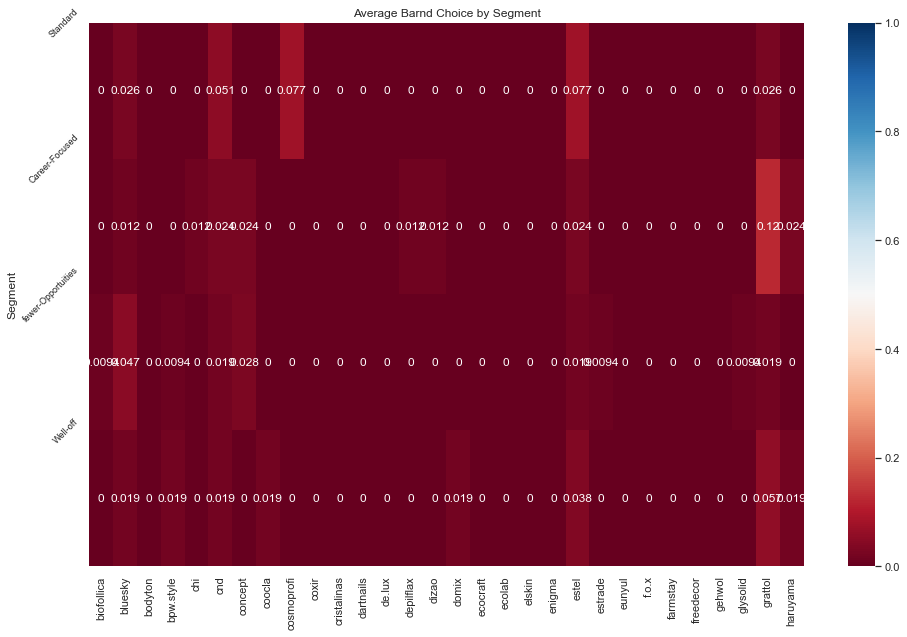

In [51]:
plt.figure(figsize=(16,10))
sns.heatmap(B,vmin=0,vmax=1,cmap='RdBu',annot=True)
plt.yticks([0,1,2,3],['Standard','Career-Focused','fewer-Opportuities','Well-off'],rotation=45,fontsize=9)
plt.title('Average Barnd Choice by Segment')
plt.show()

In [52]:
# We create a database to mySQL. 
conn = pymysql.connect(database='brand_choise',user='root',password='Aframax88')


In [53]:
cursor = conn.cursor()

In [54]:
cursor.execute('select * from brand_choise;')

4

In [55]:
insert_query = 'INSERT INTO brand_choise VALUES'

In [56]:
Brand_choise.shape

(4, 102)

In [57]:
for i in range(Brand_choise.shape[0]):
    insert_query += '('
    for j in range(Brand_choise.shape[1]):
        insert_query += str(Brand_choise[Brand_choise.columns.values[j]][i])+','
    insert_query = insert_query[:-2]+'),'

In [58]:
insert_query

'INSERT INTO brand_choise VALUES(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02564102564102564,0.0,0.0,0.0,0.05128205128205128,0.0,0.0,0.07692307692307693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07692307692307693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02564102564102564,0.0,0.0,0.0,0.0,0.0,0.0,0.07692307692307693,0.0,0.0,0.0,0.02564102564102564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02564102564102564,0.0,0.02564102564102564,0.02564102564102564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02564102564102564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10256410256410256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02564102564102564,0.0,0.0,0.0,0.0,0.0,0.0256410256410256),(0.012195121951219513,0.0,0.0,0.012195121951219513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012195121951219513,0.0,0.0,0.012195121951219513,0.024390243902439025,0.024390243902439025,0.0,0.0,0.0,0.0,0.0,0.0,0.012195121951219513,0.012195121951219513,0.0,0.0,0.0,0.0,0.0,0.024390243902439025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12195121951219512,0.0243902

In [59]:
#Brand_choise[Brand_choise.columns.values[6]][0]

In [60]:
insert_query = insert_query[:-1] + ';'

In [61]:
insert_query

'INSERT INTO brand_choise VALUES(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02564102564102564,0.0,0.0,0.0,0.05128205128205128,0.0,0.0,0.07692307692307693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07692307692307693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02564102564102564,0.0,0.0,0.0,0.0,0.0,0.0,0.07692307692307693,0.0,0.0,0.0,0.02564102564102564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02564102564102564,0.0,0.02564102564102564,0.02564102564102564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02564102564102564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10256410256410256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02564102564102564,0.0,0.0,0.0,0.0,0.0,0.0256410256410256),(0.012195121951219513,0.0,0.0,0.012195121951219513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012195121951219513,0.0,0.0,0.012195121951219513,0.024390243902439025,0.024390243902439025,0.0,0.0,0.0,0.0,0.0,0.0,0.012195121951219513,0.012195121951219513,0.0,0.0,0.0,0.0,0.0,0.024390243902439025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12195121951219512,0.0243902

In [62]:
cursor.execute(insert_query)

4

In [63]:
conn.commit()

In [64]:
conn.close()

# Preparation For Logistig Regresion

In [65]:
df = df_purchase_predictors.copy()

In [66]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,1,0,5809910,1.602944e+18,0,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a,0.0,0.0,47.0,1.0,110866.0,1.0,0.0,2
1,1,0,5812943,1.487580e+18,0,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a,0.0,0.0,47.0,1.0,110866.0,1.0,0.0,2
2,1,0,5798924,1.783999e+18,0,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3,0.0,0.0,47.0,1.0,110866.0,1.0,0.0,2
5,1,0,5837111,1.783999e+18,0,staleks,6.35,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3,0.0,0.0,47.0,1.0,110866.0,1.0,0.0,2
6,1,0,5850281,1.487580e+18,0,marathon,137.78,593016733,848f607c-1d14-474a-8869-c40e60783c9d,0.0,0.0,47.0,1.0,110866.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,1,0,5759492,1.487580e+18,0,italwax,2.37,595692020,d08cd606-9a0e-475b-87ca-51474f469975,0.0,0.0,42.0,1.0,120946.0,1.0,0.0,2
58689,1,0,5864599,1.487580e+18,0,italwax,14.52,559289862,47afcc01-33f7-4fe8-8c20-3de049cbb448,0.0,0.0,42.0,1.0,120946.0,1.0,0.0,2
58690,1,0,4938,1.487580e+18,0,runail,1.43,544718392,e645419f-a77c-4484-9cbc-cd7f98db65d2,0.0,0.0,42.0,1.0,120946.0,1.0,0.0,2
58692,1,0,37987,1.487580e+18,0,runail,42.86,595690971,1325847d-2e31-4ec2-926f-1ffb3e8b81fb,0.0,0.0,42.0,1.0,120946.0,1.0,0.0,2


In [67]:
Y=df['event_type']


In [68]:
df['price'].sum()

353281.86

In [69]:
X=pd.DataFrame()
X["Mean_price"] = df['price']
X


,Mean_price
0,5.24
1,3.97
2,3.97
5,6.35
6,137.78
...,...
58688,2.37
58689,14.52
58690,1.43
58692,42.86


In [70]:
model_purchase = LogisticRegression(solver='sag')


In [71]:
model_purchase.fit(X,Y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(solver='sag')

In [72]:
model_purchase.coef_

array([[-0.04500424]])

# Price elasticity of Purchase Probability

In [73]:
df['price'].describe()

count    32112.000000
mean        11.001553
std         23.851490
min          0.080000
25%          2.370000
50%          4.600000
75%          8.430000
max        327.780000
Name: price, dtype: float64

In [74]:
price_range=np.arange(0.5,30,0.01)

In [75]:
df_price_range = pd.DataFrame(price_range)

In [76]:
Yr = model_purchase.predict_proba(df_price_range)
Yr

array([[0.94202214, 0.05797786],
       [0.94204671, 0.05795329],
       [0.94207128, 0.05792872],
       ...,
       [0.98392434, 0.01607566],
       [0.98393145, 0.01606855],
       [0.98393857, 0.01606143]])

In [77]:
purchase_pr = Yr[:][:,1] #(0 : No Purchase , 1: Purchase )

In [78]:
# We calculate the purchase probability E=beta*price*(1-Pr(purchase))
pe = model_purchase.coef_[:,0]*price_range*(1-purchase_pr)

In [79]:
# 
df_price_elasticity = pd.DataFrame(price_range)
df_price_elasticity = df_price_elasticity.rename(columns={0:'Price_Point'})
df_price_elasticity['Mean_Pe'] = pe
df_price_elasticity

,Price_Point,Mean_Pe
0,0.50,-0.021197
1,0.51,-0.021622
2,0.52,-0.022047
3,0.53,-0.022471
4,0.54,-0.022896
...,...,...
2945,29.95,-1.326190
2946,29.96,-1.326642
2947,29.97,-1.327095
2948,29.98,-1.327547


Text(0.5, 1.0, 'Price elasticity of Purchase Probability')

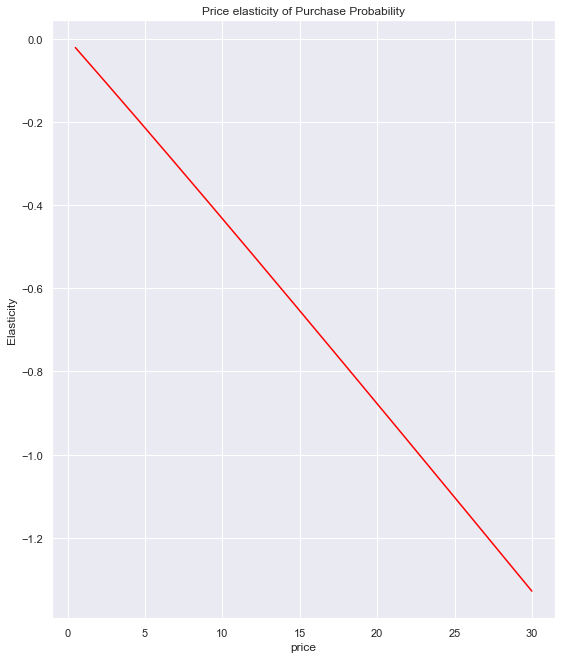

In [80]:
#The price elasticity decrease as the price increase. |E| < 1 inelastic, |E|>1 elastic. increase price 1% in inelasticity leads to less 1%  purchase probability 
plt.figure(figsize=(9,11))
plt.plot(price_range,pe,color='red')
plt.xlabel('price')
plt.ylabel('Elasticity')
plt.title('Price elasticity of Purchase Probability')

# Purchase Probability by Segments

In [83]:
df_s1 = df_purchase_predictors[df_purchase_predictors['Segment']==1]
df_s1

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
1794,1,1,5807859,1.487580e+18,0,irisk,1.27,326676174,36404a53-d92a-40c4-baab-16f18cd0652d,0.0,1.0,26.0,1.0,72429.0,0.0,0.0,1
1811,1,1,5873630,1.487580e+18,0,irisk,3.97,326676174,36404a53-d92a-40c4-baab-16f18cd0652d,0.0,1.0,26.0,1.0,72429.0,0.0,0.0,1
1814,1,0,5723496,1.487580e+18,0,runail,2.62,595437729,9dee3c62-b980-45ef-8728-ca4049e1966b,0.0,1.0,26.0,1.0,72429.0,0.0,0.0,1
1815,1,0,5706709,1.487580e+18,0,refectocil,3.65,566586166,aa2bca91-d65d-4952-8972-4872d6c232e1,0.0,1.0,26.0,1.0,72429.0,0.0,0.0,1
1816,1,0,5692967,1.487580e+18,0,lianail,6.33,540641413,c68f44c2-640b-4447-8808-39a0df2f679d,0.0,1.0,26.0,1.0,72429.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58457,1,0,5911259,1.487580e+18,0,runail,3.02,543724635,7f786908-4b83-4fad-b737-48d9c9aa0fac,1.0,1.0,29.0,1.0,114784.0,1.0,0.0,1
58458,1,0,26753,2.151191e+18,0,ardell,5.86,542892692,b9d58077-fa03-441f-929e-efd88035aa21,1.0,1.0,29.0,1.0,114784.0,1.0,0.0,1
58459,1,0,5743974,1.487580e+18,stationery.cartrige,italwax,1.98,595691344,9279368c-105f-46a8-9df3-62720ae95318,1.0,1.0,29.0,1.0,114784.0,1.0,0.0,1
58461,1,0,5776130,1.487580e+18,0,art-visage,1.98,477315260,0e8ae590-9e44-4c4f-a220-44fcd5026b07,1.0,1.0,29.0,1.0,114784.0,1.0,0.0,1


In [84]:
Y = df_s1['event_type']

In [85]:
X =pd.DataFrame()
X['Mean_Price'] = df_s1['price']

In [86]:
model_purchase_s1 = LogisticRegression(solver='sag')
model_purchase_s1.fit(X,Y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(solver='sag')

In [87]:
model_purchase_s1.coef_

array([[-0.16510547]])

In [92]:
Yrs1=model_purchase_s1.predict_proba(df_price_range)
Yrs1_prob = Yrs1[:][:,1]
pe_1 = model_purchase_s1.coef_[:,0]*price_range*(1-Yrs1_prob)
df_price_elasticity['Pe_segment_1'] = pe_1
df_price_elasticity

,Price_Point,Mean_Pe,Pe_segment_1
0,0.50,-0.021197,-0.070233
1,0.51,-0.021622,-0.071655
2,0.52,-0.022047,-0.073078
3,0.53,-0.022471,-0.074502
4,0.54,-0.022896,-0.075926
...,...,...,...
2945,29.95,-1.326190,-4.938211
2946,29.96,-1.326642,-4.939871
2947,29.97,-1.327095,-4.941531
2948,29.98,-1.327547,-4.943190


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

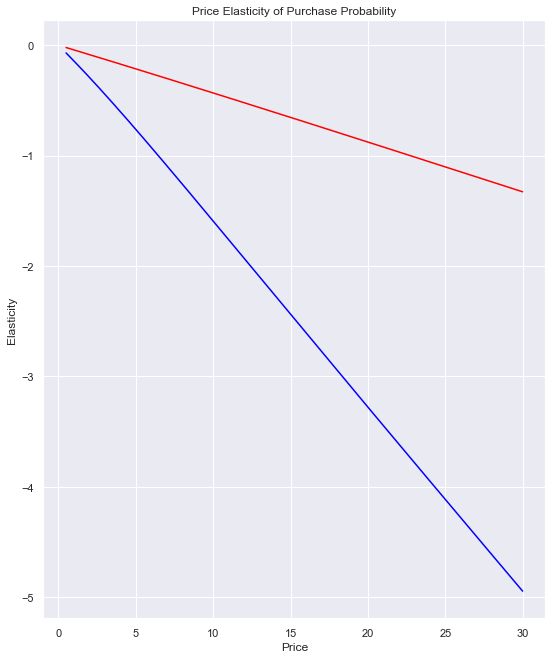

In [93]:
plt.figure(figsize=(9,11))
plt.plot(price_range,pe,color='red')
plt.plot(price_range,pe_1,color='blue')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')
